In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
df = pd.read_csv("aug_train.csv") 

In [4]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [5]:
# Replace special characters
df['experience'] = df['experience'].replace({'>20': 21, '<1': 0}).astype(float)
df['last_new_job'] = df['last_new_job'].replace({'>4': 5, 'never': 0}).astype(float)

# Fill missing values
cat_cols = df.select_dtypes(include='object').columns
num_cols = df.select_dtypes(include=np.number).columns

# Impute categorical columns
si_cat = SimpleImputer(strategy='most_frequent')
df[cat_cols] = si_cat.fit_transform(df[cat_cols])

# Impute numerical columns
si_num = SimpleImputer(strategy='mean')
df[num_cols] = si_num.fit_transform(df[num_cols])

# Label Encoding
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

# Feature Engineering example: Total experience bucket
df['exp_level'] = pd.cut(df['experience'], bins=[-1,2,5,10,21], labels=['Fresher','Junior','Mid','Senior'])
df['exp_level'] = le.fit_transform(df['exp_level'])

# Drop redundant or less useful columns
df.drop(['city'], axis=1, inplace=True)


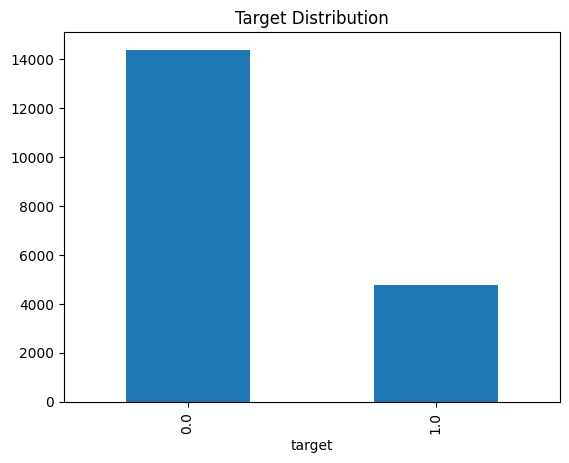

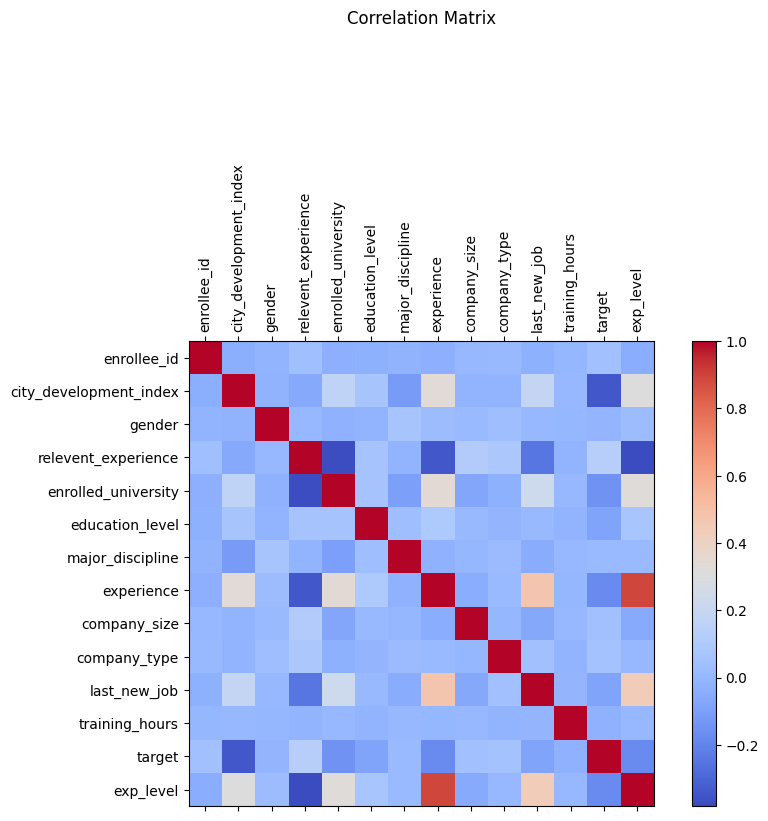

In [6]:
# Distribution of target
df['target'].value_counts().plot(kind='bar')
plt.title("Target Distribution")
plt.show()

# Correlation heatmap
plt.figure(figsize=(10,6))
plt.matshow(df.corr(), cmap='coolwarm', fignum=1)
plt.colorbar()
plt.xticks(range(len(df.columns)), df.columns, rotation=90)
plt.yticks(range(len(df.columns)), df.columns)
plt.title("Correlation Matrix", pad=100)
plt.show()


In [7]:
X = df.drop('target', axis=1)
y = df['target']

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardization
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Logistic Regression
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

# Evaluation
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[2676  204]
 [ 704  248]]
              precision    recall  f1-score   support

         0.0       0.79      0.93      0.85      2880
         1.0       0.55      0.26      0.35       952

    accuracy                           0.76      3832
   macro avg       0.67      0.59      0.60      3832
weighted avg       0.73      0.76      0.73      3832

